# TP Prétraitement des données (Titanic)

## Étape 1: Importation et aperçu des données

**1. Importer la bibliothèque pandas et charger le dataset Titanic depuis le lien suivant :**
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
dans un DataFrame nommé `df`.

In [345]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

**2. Afficher les 5 premières lignes du dataset.**

In [346]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**2. Afficher les 5 dernières lignes du dataset.**

In [347]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


**3. Afficher les dimensions du dataset (nombre de lignes et de colonnes).**

In [348]:
print(df.shape)

(891, 12)


**4. Afficher les informations générales sur les colonnes et leurs types (`info()`).**

In [349]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Étape 2: Nettoyage des données

**1. Supprimer les colonnes inutiles du DataFrame :**
`['PassengerId', 'Name', 'Ticket', 'Cabin']`.

In [350]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)

**2. Vérifier s'il existe des lignes doublons dans le dataset (`duplicated().sum()`).**

In [351]:
duplicates = df.duplicated().sum()

print("number of duplicated rows: ",int(duplicates))

number of duplicated rows:  111


**3. Supprimer les doublons et vérifier le nombre de lignes après suppression.**

In [352]:
print("Number of rows with duplicates: ",df.shape[0])
df.drop_duplicates()
print("Number of rows without duplicates: ",df.shape[0])


Number of rows with duplicates:  891
Number of rows without duplicates:  891


**4. Vérifier les valeurs manquantes.**

In [353]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**5. Imputer les valeurs manquantes de la colonne `Age` par la moyenne (strategy='mean').**

In [354]:
from sklearn.impute import SimpleImputer

In [355]:

imputer = SimpleImputer(strategy="mean")
cols = ['Age']
df[cols] = imputer.fit_transform(df[cols])

# using fillna(value,inplace=True) 
# df["Age"].fillna(df['Age'].mean(),inplace=True) 

**6. Remplacer les valeurs manquantes de la colonne `Embarked` par la valeur la plus fréquente (strategy='most_frequent').**

*Note: Vous pouvez utiliser `SimpleImputer` ou `df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)`.*

In [356]:
imputer = SimpleImputer(strategy="most_frequent")
cols = ["Embarked"]
df[cols] = imputer.fit_transform(df[cols])

# using fillna(value,inplace=True) 
# df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

**7. Vérifier qu'il ne reste plus de valeurs manquantes après imputation.**

In [357]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Étape 3: Analyse univariée

**1. Afficher les statistiques descriptives des colonnes numériques (`describe()`).**

In [358]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2. Afficher les colonnes numériques du DataFrame à l'aide de**
`df.select_dtypes (include=['float64']).columns`.

In [359]:
cols = df.select_dtypes(include=["float64"]).columns
print(cols)

Index(['Age', 'Fare'], dtype='object')


**3. Créer un histogramme de la variable `Age` avec Seaborn (`sns.histplot`) et afficher la courbe de densité (`kde=True`).**

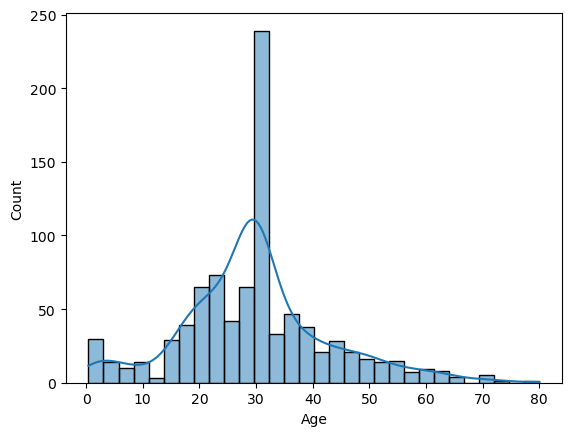

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df,x="Age",kde=True)
plt.show()



**4. Créer un boxplot pour la même variable `Age` et interpréter la position de la médiane.**

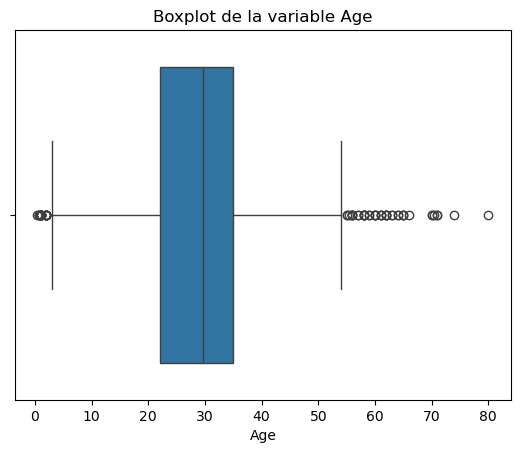

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Boxplot de la variable Age")
sns.boxplot(data=df,x="Age",orientation="horizontal")
plt.show()


<div><b  style="color:red">Interprétation:</b> La distribution des âges est presque symétrique. La médiane est centrée dans la boîte</div>

**5. Répéter les deux graphiques précédents pour la variable `Fare` et interpréter les résultats.**

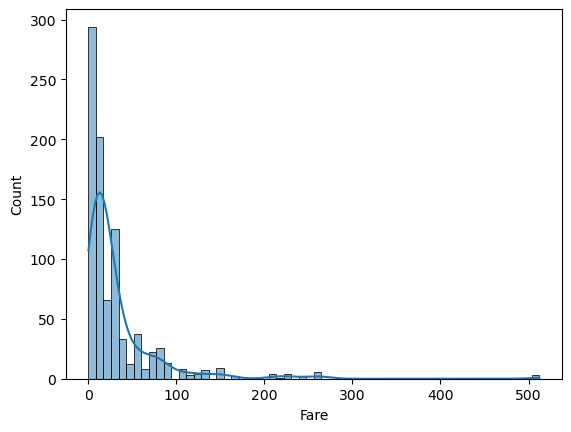

In [362]:
# Histogramme pour Fare
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df,x="Fare",kde=True)
plt.show()


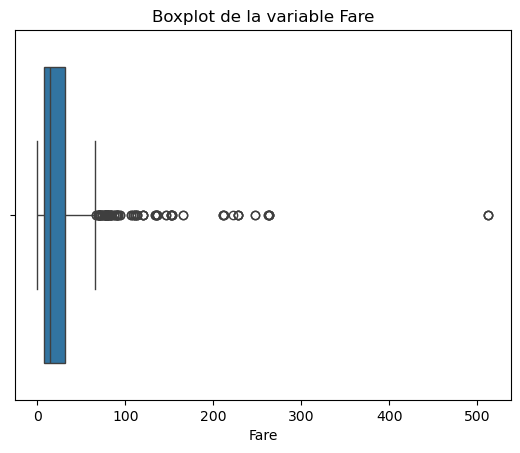

In [363]:
# Boxplot pour Fare
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Boxplot de la variable Fare")
sns.boxplot(data=df,x="Fare",orientation="horizontal")
plt.show()

<div><b  style="color:red">Interprétation:</b> La médiane est décalée vers la gauche <b>==></b> presque tout le monde a payé un prix très bas, Cependant, on observe une forte asymétrie positive (positive skewness) due à la présence de quelques prix de billets très élevés.</div>

## Étape 4: Suppression des valeurs aberrantes (méthode IQR)

**1. Calculer les premier (Q1) et troisième (Q3) quartiles de la variable `Age`.**

In [364]:
Q1 = df["Age"].quantile(.25)
Q3 = df["Age"].quantile(.75)

print("Q1: ",Q1)
print("Q3: ",Q3)


Q1:  22.0
Q3:  35.0


**2. Calculer l'écart interquartile (IQR) à partir de Q1 et Q3.**</br>

In [365]:
IQR = Q3 - Q1 
print("IQR: ",IQR)

IQR:  13.0


**3. Déterminer les bornes inférieure et supérieure :**
   - $borne\ inférieure = Q1 - 1.5 \times IQR$
   - $borne\ supérieure = Q3 + 1.5 \times IQR$

In [366]:

borneInf = max(0,Q1 - 1.5 * IQR)
borneSup = Q3 + 1.5 * IQR

print("Borne inférieure: ",borneInf)
print("Borne supérieur: ",borneSup)

Borne inférieure:  2.5
Borne supérieur:  54.5


**4. Filtrer le DataFrame pour ne garder que les valeurs de `Age` comprises entre ces deux bornes.**

In [367]:
df = df[(df["Age"]>=borneInf) & (df["Age"]<=borneSup)]

**5. Répéter la même opération pour la variable `Fare`.**

In [368]:
Q1 = df["Fare"].quantile(.25)
Q3 = df["Fare"].quantile(.75)

print("Q1: ",Q1)
print("Q3: ",Q3)

IQR = Q3 - Q1 
print("IQR: ",IQR)

borneInf = max(0,Q1 - 1.5 * IQR)
borneSup = Q3 + 1.5 * IQR

print("Borne inférieure: ",borneInf)
print("Borne supérieur: ",borneSup)

df = df[(df["Fare"]>=borneInf) & (df["Fare"]<=borneSup)]

Q1:  7.8958
Q3:  30.0708
IQR:  22.174999999999997
Borne inférieure:  0
Borne supérieur:  63.333299999999994


**6. Afficher à nouveau les boxplots de `Age` et `Fare` après suppression des outliers.**

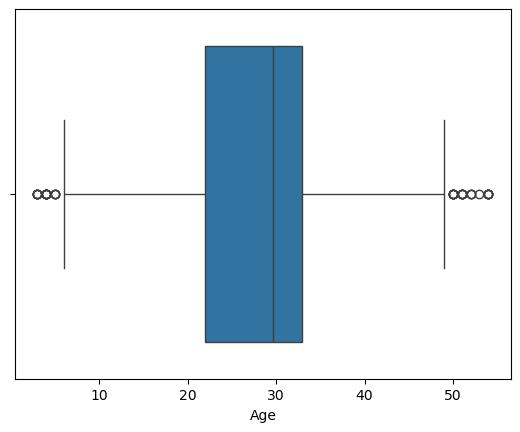

In [369]:
# Boxplot Age après suppression
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df,x="Age",orientation="horizontal")
plt.show()


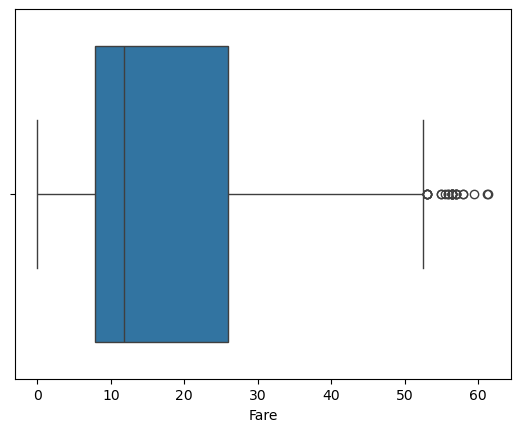

In [370]:
# Boxplot Fare après suppression
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df,x="Fare",orientation="horizontal")
plt.show()


## Étape 5: Analyse bivariée

**1. Calculer la matrice de corrélation entre `Age` et `Fare` (`df[['Age', 'Fare']].corr()`).**

In [371]:
corr = df[["Age","Fare"]].corr()
print(corr)

           Age      Fare
Age   1.000000  0.090532
Fare  0.090532  1.000000


**2. Créer un scatter plot (nuage de points) représentant la relation entre `Age` et `Fare`.**

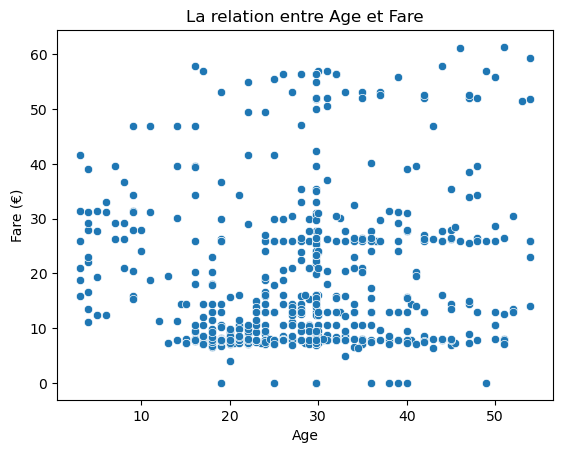

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("La relation entre Age et Fare")
plt.xlabel("Age")
plt.ylabel("Fare (€)")

sns.scatterplot(data=df, x='Age', y='Fare')
plt.show()


**3. Colorer les points selon la variable `Pclass` (`hue='Pclass'`).**

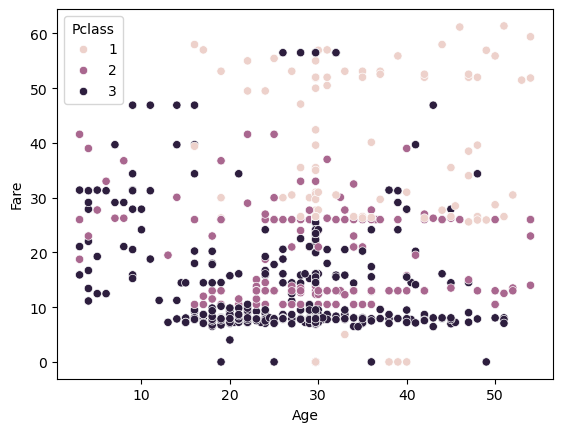

In [373]:
sns.scatterplot(data=df, x='Age', y='Fare',hue="Pclass")
plt.show()


**4. Ajouter une ligne de régression linéaire sur le scatter (`sns.regplot` ou `sns.lmplot`).**


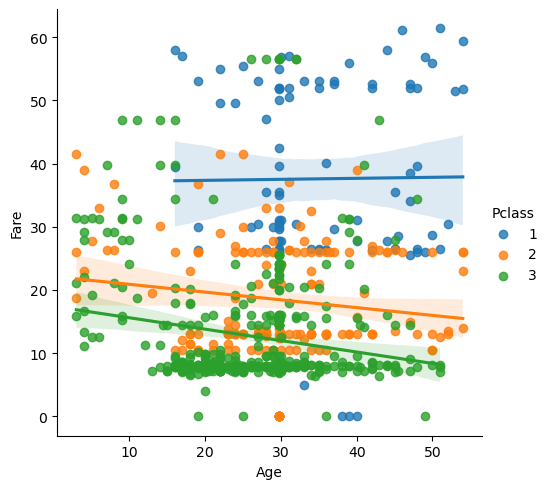

In [374]:

sns.lmplot(data=df, x='Age', y='Fare',hue="Pclass")
plt.show()

**5. Créer un diagramme en barres représentant le nombre total de passagers par `Pclass` et `Sex`.**

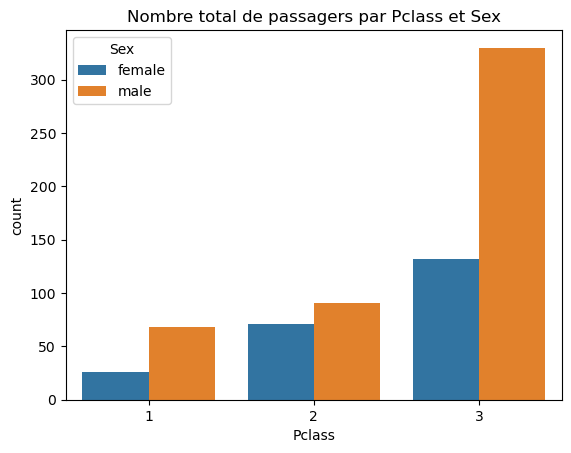

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Nombre total de passagers par Pclass et Sex")
sns.countplot(data=df,x="Pclass",hue="Sex")
plt.show()

**6. Créer un diagramme en barres représentant la moyenne d'âge des passagers par `Pclass` et `Sex`.**

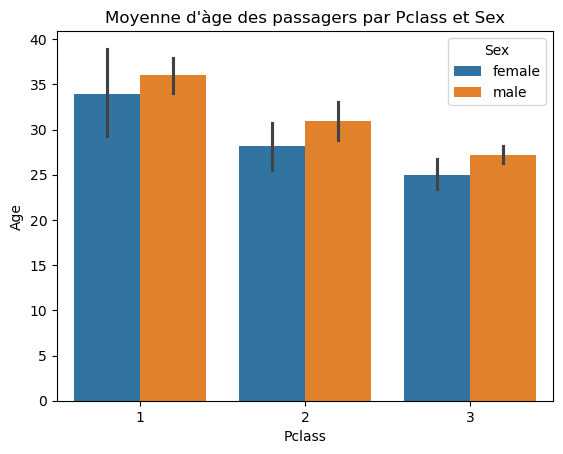

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Moyenne d'àge des passagers par Pclass et Sex")
sns.barplot(data=df,y="Age",x="Pclass",hue="Sex")
plt.show()

**7. Interpréter les résultats.**

<div><b style="color:red">Interprétation:</b>  L'âge moyen diminue généralement à mesure que la classe de passagers augmente (de Pclass 1 à Pclass 3). Cependant, Le 3éme Pclass contient le plus grand nombre de passagers</div>

## Étape 6: Séparation des variables (features) de la variable (target)

**1. Séparer la variable cible `Survived` du reste du dataset (définir `X` et `y`).**

In [377]:
col_cible = "Survived"
y = df[col_cible]

X = df.drop(col_cible,axis=1)

print(f"La variable cible ou target (y) est : {col_cible}")
print(f"Les variables features (X) contiennent {X.shape[1]} colonnes.")

La variable cible ou target (y) est : Survived
Les variables features (X) contiennent 7 colonnes.


## Étape 7: Encodage et normalisation

**1. Appliquer un `LabelEncoder` sur la variable `Sex`.**

In [378]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X["Sex"] = le.fit_transform(X["Sex"])

print(df)


     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
5           0       3    male  29.699118      0      0   8.4583        Q
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[718 rows x 8 columns]


**2. Appliquer un `OneHotEncoder` sur la variable `Embarked`.**

*Note: L'utilisation de `pd.get_dummies(X, columns=['Embarked'])` est souvent plus simple pour cette étape.*

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False,drop="first",dtype="int64")
embarked_encoded= ohe.fit_transform(X[['Embarked']])

feature_names = ohe.get_feature_names_out(['Embarked'])

df_embarked_encoded = pd.DataFrame(
  data=embarked_encoded,
  columns=feature_names,
  index=X.index
)

X = X.drop("Embarked",axis=1)
X = X.join(df_embarked_encoded)


     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    1  22.000000      1      0   7.2500           0           1
2         3    0  26.000000      0      0   7.9250           0           1
3         1    0  35.000000      1      0  53.1000           0           1
4         3    1  35.000000      0      0   8.0500           0           1
5         3    1  29.699118      0      0   8.4583           1           0
..      ...  ...        ...    ...    ...      ...         ...         ...
886       2    1  27.000000      0      0  13.0000           0           1
887       1    0  19.000000      0      0  30.0000           0           1
888       3    0  29.699118      1      2  23.4500           0           1
889       1    1  26.000000      0      0  30.0000           0           0
890       3    1  32.000000      0      0   7.7500           1           0

[718 rows x 8 columns]


**3. Vérifier la forme finale du dataset `X` après l'encodage.**

In [392]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    1  22.000000      1      0   7.2500           0           1
2         3    0  26.000000      0      0   7.9250           0           1
3         1    0  35.000000      1      0  53.1000           0           1
4         3    1  35.000000      0      0   8.0500           0           1
5         3    1  29.699118      0      0   8.4583           1           0
..      ...  ...        ...    ...    ...      ...         ...         ...
886       2    1  27.000000      0      0  13.0000           0           1
887       1    0  19.000000      0      0  30.0000           0           1
888       3    0  29.699118      1      2  23.4500           0           1
889       1    1  26.000000      0      0  30.0000           0           0
890       3    1  32.000000      0      0   7.7500           1           0

[718 rows x 8 columns]


**4. Appliquer une standardisation (`StandardScaler`) sur les variables `Age` et `Fare`.**

In [380]:
from sklearn.preprocessing import StandardScaler

# Attention : Il est préférable d'appliquer le scaler APRÈS la séparation Train/Test 
# pour éviter le data leakage (fit sur train, transform sur train et test).
# Mais si on suit la consigne à la lettre :

## Étape 8: Séparation du jeu de données

**1. Séparer les données en deux ensembles :**
- 80% pour l'entraînement
- 20% pour le test

Utilisez le paramètre `random_state=1` afin de garantir que la répartition soit identique à chaque exécution du programme.

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**2. Afficher les dimensions de `X_train`, `X_test`, `y_train` et `y_test`.**

In [397]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-" * 50)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (574, 8)
y_train shape: (574,)
--------------------------------------------------
X_test shape: (144, 8)
y_test shape: (144,)


## Étape 9: Vérification finale

**1. Vérifier les dimensions des ensembles d'entraînement et de test pour s'assurer que la division a bien été effectuée.**

In [ ]:
total_rows = X_train.shape[0] + X_test.shape[0]
print(f"Nombre total de lignes : {total_rows}")

Nombre total de lignes : 718
